##Carga desde kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!kaggle competitions download -c udea-ai4eng-20241
!unzip udea-ai4eng-20241.zip

udea-ai4eng-20241.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  udea-ai4eng-20241.zip
replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: submission_example.csv  
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


##Carga desde el fichero

In [ ]:
#!unzip /content/train.csv.zip
!unzip train.csv.zip

Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


##Proyecto

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
z = pd.read_csv('train.csv')

In [9]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo


In [ ]:
#¿Cuántos estudiantes hay por programa académico?
z.ESTU_PRGM_ACADEMICO.value_counts()

DERECHO                                                   53244
ADMINISTRACION DE EMPRESAS                                51902
CONTADURIA PUBLICA                                        39664
PSICOLOGIA                                                31932
INGENIERIA INDUSTRIAL                                     28481
                                                          ...  
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA                           1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES                    1
ADMINISTRACION DE COMERCIO EXTERIOR                           1
LICENCIATURA EN EDUCACI¿N F¿SICA RECREACI¿N Y DEPORTES        1
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                         1
Name: ESTU_PRGM_ACADEMICO, Length: 948, dtype: int64

In [ ]:
#¿Cuántos estudiantes hay por departamento?
z.ESTU_PRGM_DEPARTAMENTO.value_counts()

BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO           41020
SANTANDER           28828
NORTE SANTANDER     22588
BOLIVAR             20629
BOYACA              14048
CUNDINAMARCA        14018
NARIÑO              13454
RISARALDA           12679
CORDOBA             12188
TOLIMA              11921
CALDAS              11640
CAUCA               11471
HUILA                9995
MAGDALENA            9512
SUCRE                8674
CESAR                8279
QUINDIO              8229
META                 7910
LA GUAJIRA           4778
CHOCO                4289
CAQUETA              2659
CASANARE             1852
PUTUMAYO              795
ARAUCA                589
AMAZONAS               40
GUAVIARE               37
VAUPES                 14
SAN ANDRES             10
Name: ESTU_PRGM_DEPARTAMENTO, dtype: int64

In [ ]:
#¿Cuál es el estrato de la vivienda de los estudiantes?
z.FAMI_ESTRATOVIVIENDA.value_counts()

Estrato 2      232671
Estrato 3      210685
Estrato 1      111991
Estrato 4       65514
Estrato 5       23608
Estrato 6       12605
Sin Estrato      3289
Name: FAMI_ESTRATOVIVIENDA, dtype: int64

In [ ]:
#¿Cuántos estudiantes tienen acceso a internet?
z.FAMI_TIENEINTERNET.value_counts()

Si    592514
No     73357
Name: FAMI_TIENEINTERNET, dtype: int64

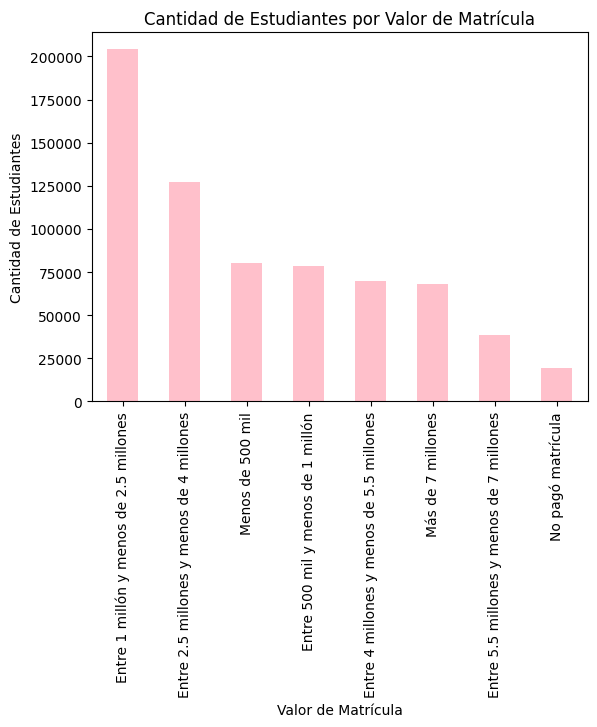

In [ ]:
estudiantes_por_matricula = z['ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts()

# Graficar
estudiantes_por_matricula.plot(kind='bar', color='pink')
plt.xlabel('Valor de Matrícula')
plt.ylabel('Cantidad de Estudiantes')
plt.title('Cantidad de Estudiantes por Valor de Matrícula')
plt.xticks(rotation=90)
plt.show()

In [15]:
#Filtre solo los resultados de los estudiantes que residen en el departamento de ANTIOQUIA
antioquia_z = z[z['ESTU_PRGM_DEPARTAMENTO'] == 'ANTIOQUIA']
antioquia_z

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo
5,659872,20203,MEDICINA VETERINARIA,ANTIOQUIA,Más de 7 millones,Menos de 10 horas,Estrato 5,Si,Educación profesional completa,Si,Si,N,No,Si,Si,Secundaria (Bachillerato) completa,medio-alto
9,465511,20183,ADMINISTRACION DE EMPRESAS,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 5,Si,Postgrado,Si,Si,N,Si,Si,Si,Postgrado,alto
18,797253,20183,CIENCIA POLITICA,ANTIOQUIA,Menos de 500 mil,Más de 30 horas,Estrato 1,No,Primaria incompleta,No,No,N,Si,Si,No,Primaria incompleta,alto
28,240296,20183,INGENIERIA CIVIL,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,Si,N,No,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692440,237810,20203,FINANZAS,ANTIOQUIA,Más de 7 millones,0,Estrato 6,Si,Educación profesional completa,Si,Si,N,No,Si,Si,Educación profesional completa,medio-alto
692456,344635,20212,CONTADURIA PUBLICA,ANTIOQUIA,Entre 4 millones y menos de 5.5 millones,Entre 21 y 30 horas,Estrato 5,No,Educación profesional completa,Si,No,N,Si,Si,No,Secundaria (Bachillerato) incompleta,bajo
692459,279065,20183,BACTERIOLOGIA Y LABORATORIO CLINICO,ANTIOQUIA,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa,medio-alto
692466,372690,20183,CONTADURIA PUBLICA,ANTIOQUIA,Entre 1 millón y menos de 2.5 millones,Entre 11 y 20 horas,Estrato 3,Si,Primaria incompleta,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo


In [21]:
#Qué carreras se estudian en ANTIOQUIA?
cantidad_carreras = antioquia_z['ESTU_PRGM_ACADEMICO'].nunique()
carreras_distintas = antioquia_z['ESTU_PRGM_ACADEMICO'].unique()
print("Hay ", cantidad_carreras, " carreras distintas, las cuales son:")
print(carreras_distintas)

Hay  322  carreras distintas, las cuales son:
['PSICOLOGIA' 'MEDICINA VETERINARIA' 'ADMINISTRACION DE EMPRESAS'
 'CIENCIA POLITICA' 'INGENIERIA CIVIL' 'CONTADURIA PÚBLICA'
 'INGENIERIA AGROINDUSTRIAL' 'COMUNICACION AUDIOVISUAL' 'DERECHO'
 'LICENCIATURA EN LENGUAS EXTRANJERAS' 'MEDICINA VETERINARIA Y ZOOTECNIA'
 'INGENIERIA ELECTRONICA' 'QUIMICA FARMACEUTICA'
 'LICENCIATURA EN EDUCACION PREESCOLAR' 'INGENIERIA DE CONTROL'
 'ENFERMERIA' 'COMUNICACION Y LENGUAJES AUDIOVISUALES'
 'INGENIERIA DE DISEÑO DE PRODUCTO' 'MEDICINA' 'INGENIERIA QUIMICA'
 'INGENIERIA MECANICA' 'LICENCIATURA EN CIENCIAS SOCIALES' 'FISIOTERAPIA'
 'INGENIERIA FINANCIERA' 'CONTADURÍA PÚBLICA' 'PROFESIONAL EN DEPORTE'
 'ADMINISTRACION DE EMPRESAS TURISTICAS' 'INGENIERIA DE SISTEMAS'
 'INGENIERIA DE PRODUCCION' 'ADMINISTRACION DE NEGOCIOS INTERNACIONALES'
 'ENFERMERÍA' 'LICENCIATURA EN FILOSOFIA Y EDUCACION RELIGIOSA'
 'LICENCIATURA EN TEOLOGIA' 'INGENIERIA AGROPECUARIA'
 'INGENIERIA INDUSTRIAL' 'NEGOCIOS INTERNACIONALES

In [16]:
#Se requiere saber qué cantidad de personas que residen en ANTIOQUIA, estudian cada programa académico
antioquia_z['ESTU_PRGM_ACADEMICO'].value_counts()

CONTADURIA PUBLICA                             6938
DERECHO                                        6927
ADMINISTRACION DE EMPRESAS                     4244
PSICOLOGIA                                     3815
INGENIERIA DE SISTEMAS                         2757
                                               ... 
ADMINISTRACION EN NEGOCIOS INTERNACIONALES        1
LICENCIATURA EN ARTES ESC¿NICAS                   1
LICENCIATURA EN EDUCACION FISICA Y DEPORTES       1
HOTELERIA Y TURISMO                               1
FILOSOFIA Y LETRAS                                1
Name: ESTU_PRGM_ACADEMICO, Length: 322, dtype: int64